### Building and Organizing Complex Queries
https://app.dataquest.io/m/465/building-and-organizing-complex-queries

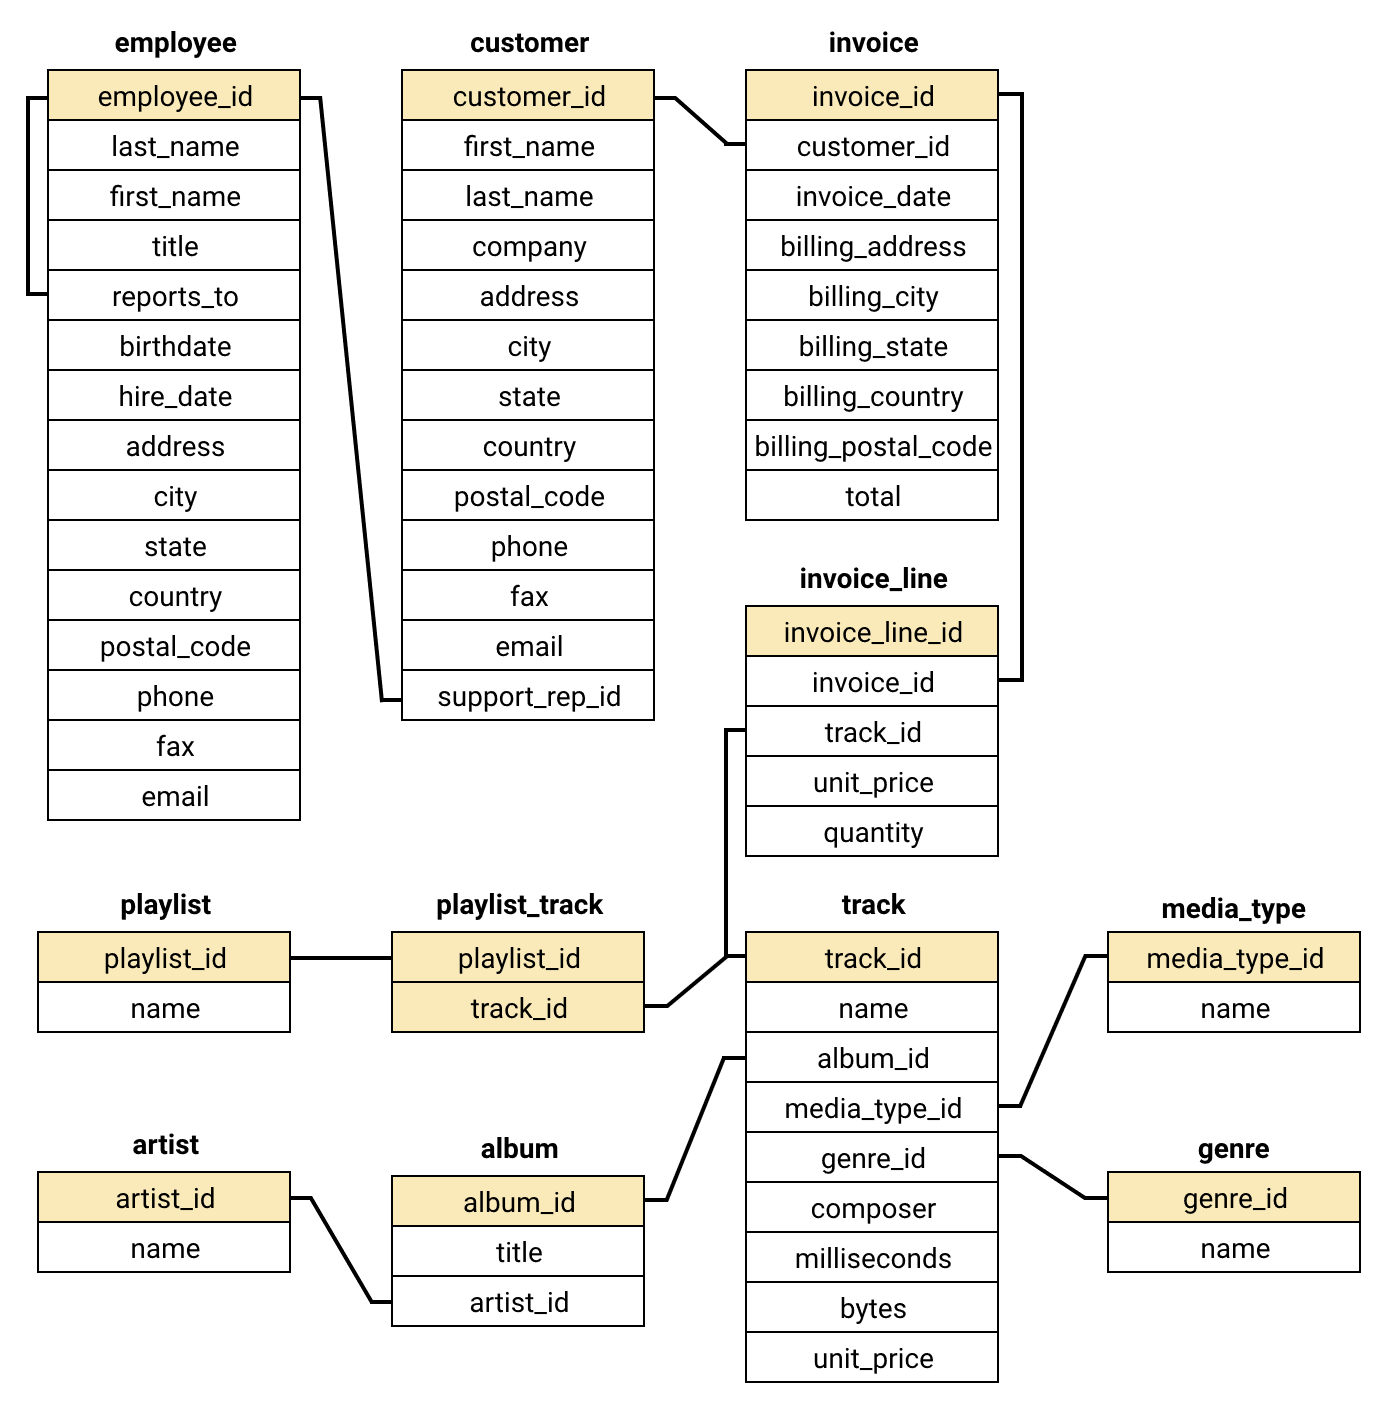

#### Basics:  filtering, joins, aggregation, concatination, wild cards

In [ ]:
/*  returns all majors with majority female 
 and all majors had a median salary greater than 50000 */
    
    SELECT Major, Major_category, Median, ShareWomen 
    FROM recent_grads 
    WHERE ShareWomen > 0.5 AND Median > 50000

In [ ]:
/* returns the first 20 majors that 
 either have a Median salary greater than or equal to 10,000, 
 or have less than or equal to 1,000 Unemployed people */

    SELECT Major, Median, Unemployed 
    FROM recent_grads 
    WHERE Median >= 10000 OR Unemployed <=1000
    LIMIT 20

In [ ]:
/* returns all majors that fell under the category of Engineering 
 and either had mostly women graduates 
 or had an unemployment rate below 5.1%, which was the rate in August 2015 */

    SELECT Major, Major_category, ShareWomen, Unemployment_rate 
    FROM recent_grads
    WHERE (Major_category = 'Engineering') AND (ShareWomen > 0.5 OR Unemployment_rate < 0.051)

In [ ]:
/* returns all majors where ShareWomen is greater than 0.3 
 and Unemployment_rate is less than .1.  
 Order the results in descending order by the ShareWomen column */

    SELECT Major, ShareWomen, Unemployment_rate 
    FROM recent_grads
    WHERE ShareWomen > 0.3 AND Unemployment_rate < 0.1
    ORDER BY ShareWomen DESC

In [ ]:
/* returns the Engineering or Physical Sciences majors in asecending order of unemployment rates. */

    SELECT Major_category, Major, Unemployment_rate 
    FROM recent_grads
    WHERE Major_category='Engineering' OR Major_category = 'Physical Sciences'
    ORDER BY Unemployment_rate ASC

In [ ]:
/* returns the average ratio (Sample_size/Total)) for all of the majors */

    SELECT ROUND(
                AVG(cast(Sample_size AS float)/cast(Total AS float))
                , 2) AS avg_ratio 
    FROM recent_grads

In [ ]:
/* use numbers to indicate variables */

SELECT name, migration_rate 
    FROM FACTS
    ORDER BY 2 DESC;

In [ ]:
/* returns, in order: A column of country names, called country, 
 A column of each country's capital city, called capital_city */

    SELECT f.name country, 
           c.name capital_city 
    FROM cities c
    INNER JOIN facts f ON f.id = c.facts_id
    WHERE c.capital=1

In [ ]:
/* returns the countries that don't exist in cities. Query should return two columns: 
 The country names, with the alias country, The country population.  
 Include only the countries from facts that don't have a corresponding value in cities. */

    SELECT f.name country, f.population 
    FROM facts f
    LEFT JOIN cities c ON c.facts_id = f.id 
    WHERE c.name IS NULL

In [ ]:
/* returns the 10 capital cities with the highest population ranked from biggest to smallest 
 Include the following columns in order: 
 capital_city, the name of the city, 
 country, the name of the country the city is from.  
 population, the population of the city. */

    SELECT c.name capital_city, 
           f.name country, 
           c.population 
    FROM cities c
    INNER JOIN facts f ON f.id = c.facts_id
    WHERE c.capital=1
    ORDER BY 3 DESC LIMIT 10;

In [ ]:
/* gathers data about the invoice with an invoice_id of 4. 
 Include the following columns in order:
   The id of the track, track_id.
   The name of the track, track_name.
   The name of media type of the track, track_type.
   The price that the customer paid for the track, unit_price.
   The quantity of the track that was purchased, quantity. */

    SELECT 
        il.track_id, 
        t.name track_name, 
        mt.name track_type,
        il.unit_price, 
        il.quantity 
    FROM invoice_line il
    INNER JOIN track t ON t.track_id=il.track_id
    INNER JOIN media_type mt ON mt.media_type_id=t.media_type_id
    WHERE il.invoice_id = 4;

In [ ]:
/* FRom above query, add a column containing the artists name.  
 The column should be called artist_name.  
 The column should be placed between track_name and track_type */

    SELECT
        il.track_id,
        t.name track_name,
        ar.name artist_name,
        mt.name track_type,
        il.unit_price,
        il.quantity
    FROM invoice_line il
    INNER JOIN track t ON t.track_id = il.track_id
    INNER JOIN album al ON al.album_id=t.album_id
    INNER JOIN artist ar ON ar.artist_id=al.artist_id
    INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
    WHERE il.invoice_id = 4;

In [ ]:
/* USE concatenate operator: || */
    
    SELECT ("this" || "is" || "my" || "string"); 
    SELECT
        album_id,
        artist_id,
        "album id is" || " " || album_id col_1,
        "artist id is" ||" " || artist_id col2,
        album_id || " " || artist_id col3
    FROM album LIMIT 3;

In [ ]:
/* returns information about each employee and their supervisor. 
 Query should return the following columns, in order:
    employee_name - containing the first_name and last_name columns separated by a space
    employee_title - the title of that employee
    supervisor_name - the first and last name of the person the employee reports to
    supervisor_title - the title of the person the employee reports to
    The report should include employees even if they do not report to another employee.
    The report should be sorted alphabetically by the employee_name column. */
    
    SELECT e.first_name || " " || e.last_name employee_name, 
       e.title employee_title,
       s.first_name || " " || s.last_name supervisor_name,
       s.title supervisor_title
    FROM employee e
    LEFT JOIN employee s ON s.employee_id = e.reports_to
    ORDER By employee_name

In [ ]:
    SELECT
        first_name,
        last_name,
        phone
    FROM customer
    WHERE first_name LIKE "%Jen%";

In [ ]:
/* Find the contact details a customer with a first_name containing Belle from the database.  
 include the following columns in order: first_name, last_name, phone */
        
    SELECT first_name, last_name, phone
    FROM customer
    WHERE first_name LIKE "%Belle%"

#### CASE
    WHEN [comparison_1] THEN [value_1]
    WHEN [comparison_2] THEN [value_2]
    ELSE [value_3]
    END
    AS [new_column_name]

In [ ]:
/* summarizes the purchases of each customer. No two customers with the same name, 
 including the following columns, in order:
    customer_name - containing the first_name and last_name columns separated by a space
    number_of_purchases, counting the number of purchases made by each customer.
    total_spent - the sum of customers total purchases made by each customer.
    customer_category - a column that categorizes the customer based on their total purchases. 
    The column should contain the following values:
        small spender - If the customer's total purchases are less than $40.
        big spender - If the customer's total purchases are greater than $100.
        regular - If the customer's total purchases are between $40 and $100 (inclusive).
        Order results by the customer_name column. */
        
    SELECT c.first_name || " " || c.last_name customer_name, 
           COUNT(*) number_of_purchases,
           SUM(i.total) total_spent,
           CASE
               WHEN SUM(i.total) < 40 THEN 'small spender'
               WHEN SUM(i.total) > 100 THEN 'big spender'
               ELSE 'regular'
           END AS customer_category
    FROM customer c
    INNER JOIN invoice i ON i.customer_id = c. customer_id
    GROUP by 1
    ORDER BY 1

### Subqueries

#### Subqueries in WHERE clause

In [ ]:
/* returns the majors that are below the average for Unemployment_rate */
    SELECT Major, Unemployment_rate 
    FROM recent_grads
    WHERE Unemployment_rate < (SELECT AVG(Unemployment_rate) 
                               FROM recent_grads)
    ORDER BY Unemployment_rate ASC

In [ ]:
/* computes the proportion (as a float value) of rows 
 that contain above average values for the ShareWomen */
    
    SELECT CAST(COUNT(*) as float)/(SELECT CAST(COUNT(*) as float) 
                                    FROM recent_grads) AS proportion_abv_avg FROM recent_grads
    WHERE ShareWomen > (SELECT AVG(ShareWomen) FROM recent_grads)
    

In [ ]:
/* returns the Major and Major_category columns for the rows where: 
 Major_category is one of the 5 highest group level sums for the Total column */

    SELECT Major, Major_category 
    FROM recent_grads 
    WHERE Major_category IN 
                        (SELECT Major_category FROM recent_grads 
                         GROUP BY Major_category
                         ORDER BY  SUM(Total) DESC
                         LIMIT 5)

In [ ]:
/* selects the Major, Major_category, and the computed ratio columns, 
 filters to just the rows where ratio is greater than avg_ratio. */
    
    SELECT Major, 
           Major_category, 
           CAST(Sample_size AS float)/CAST(Total AS float) AS ratio
    FROM recent_grads
    WHERE ratio > (SELECT AVG(
                              CAST(Sample_size AS float)/CAST(Total AS float)
                             ) 
                   FROM recent_grads) 

In [ ]:
/* for each of the six continents listed in 2015, 
 identify which country had the maximum inflation rate 
 and how high it was */

    SELECT name, 
           continent, 
           inflation_rate
    FROM countries 
    INNER JOIN economies ON countries.code = economies.code
    WHERE year = 2015 AND inflation_rate IN (SELECT MAX(inflation_rate) AS max_inf
                                             FROM (SELECT name, 
                                                          continent, 
                                                          inflation_rate
                                                   FROM countries
                                                   INNER JOIN economies
                                                    ON countries.code = economies.code
                                                   WHERE year = 2015) AS subquery
                                             GROUP BY continent);

#### Subqueries in JOIN clause

In [ ]:
    SELECT c.name capital_city, 
           f.name country, 
           c.population
    FROM facts f
    INNER JOIN (SELECT * 
                FROM cities
                WHERE capital =1) c ON c.facts_id = f.id
    LIMIT 10

In [ ]:
/*  returns capital cities with populations of over 10 million 
 ordered from largest to smallest. 
 Include the following columns: 
 capital_city - the name of the city. 
 country - the name of the country the city is the capital of.  
 population - the population of the city. */

    SELECT c.name capital_city, 
           f.name country, 
           c.population
    FROM facts f
    INNER JOIN (SELECT * 
                FROM cities
                WHERE population > 10000000 AND capital=1) c ON c.facts_id = f.id
    ORDER by c.population DESC
    LIMIT 10

In [ ]:
/* generates columns in order: 
 country, the name of the country.  
 urban_pop, the sum of the population in major urban areas belonging to that country.  
 total_pop, the total population of the country.  
 urban_pct, the percentage of the popularion within urban areas, 
            calculated by dividing urban_pop by total_pop.  
 Only countries that have an urban_pct greater than 0.5.  
 Rows should be sorted by urban_pct in ascending order. */
    
    SELECT 
        f.name country, 
        c.urban_pop, 
        f.population total_pop, 
        c.urban_pop/CAST(f.population AS float) urban_pct 
    FROM facts f
    INNER JOIN (SELECT 
                    facts_id, 
                    SUM(population) urban_pop 
                FROM cities
                GROUP BY facts_id) c ON c.facts_id = f.id
    WHERE urban_pct > 0.5
    ORDER BY urban_pct ASC

In [ ]:
/* returns the top 5 albums, calculated by No of times a track from that album was purchased. 
 Return the following columns, in order:
    album, the title of the album
    artist, the artist who produced the album
    tracks_purchased, the total number of tracks purchased from that album */
    
    SELECT
        ta.album,
        ta.artist,
        COUNT(*) tracks_purchased
    FROM invoice_line il
    INNER JOIN (SELECT
                    t.track_id,    
                    al.title album,
                    ar.name artist
                FROM track t
                INNER JOIN album al ON al.album_id = t.album_id
                INNER JOIN artist ar ON ar.artist_id = al.artist_id
               ) ta ON ta.track_id = il.track_id
    GROUP BY 1, 2
    ORDER BY 3 DESC LIMIT 5;

#### subquery in FROM statement

In [ ]:
SELECT
    country,
    date,
    home_goal,
    away_goal
FROM 
    (SELECT name AS country, 
            m.date, 
            m.home_goal, 
            m.away_goal,
            (m.home_goal + m.away_goal) AS total_goals
    FROM match AS m
    LEFT JOIN country AS c
    ON m.country_id = c.id) AS subq
WHERE total_goals >= 10;

#### subquery in SELECT statement:  useful to create calculated columns in a query

In [ ]:
SELECT 
    l.name AS league,
    ROUND(AVG(m.home_goal + m.away_goal), 2) AS avg_goals,
    (SELECT ROUND(AVG(home_goal + away_goal), 2)
     FROM match
     WHERE season = '2013/2014') AS overall_avg
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id

In [ ]:
SELECT
    l.name AS league,
    ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
    ROUND(AVG(m.home_goal + m.away_goal) - 
    (SELECT AVG(home_goal + away_goal)
     FROM match 
     WHERE season = '2013/2014'),2) AS diff
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
WHERE season = '2013/2014'
GROUP BY l.name;

In [ ]:
SELECT 
    m.stage,
    ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
    ROUND((SELECT AVG(home_goal + away_goal) 
           FROM match 
           WHERE season = '2012/2013'),2) AS overall
FROM match AS m
WHERE season = '2012/2013'
GROUP BY m.stage;

In [ ]:
SELECT 
    s.stage,
    ROUND(s.avg_goals,2) AS avg_goals
FROM 
    (SELECT
         stage,
         AVG(home_goal + away_goal) AS avg_goals
     FROM match
     WHERE season = '2012/2013'
     GROUP BY stage) AS s
WHERE 
    s.avg_goals > (SELECT AVG(home_goal + away_goal) 
                   FROM match WHERE season = '2012/2013');

In [ ]:
SELECT 
    s.stage,
    ROUND(s.avg_goals,2) AS avg_goal,
    (SELECT AVG(home_goal + away_goal) 
     FROM match 
     WHERE season = '2012/2013') AS overall_avg
FROM 
    (SELECT
         stage,
         AVG(home_goal + away_goal) AS avg_goals
     FROM match
     WHERE season = '2012/2013'
     GROUP BY stage) AS s
WHERE 
    s.avg_goals > (SELECT AVG(home_goal + away_goal) 
                   FROM match 
                   WHERE season = '2012/2013');

#### Correlated Subqueries: useful for matching data across multiple columns

In [ ]:
SELECT 
    main.country_id,
    date,
    main.home_goal, 
    away_goal
FROM match AS main
WHERE 
    (home_goal + away_goal) > 
        (SELECT AVG((home_goal + sub.away_goal) * 3)
         FROM match AS sub
         WHERE main.country_id = sub.country_id); -- Join the main query to the subquery

In [ ]:
SELECT 
    main.country_id,
    date,
    main.home_goal,
    away_goal
FROM match AS main
WHERE 
    (home_goal + away_goal) = 
        (SELECT MAX(home_goal + sub.away_goal)
         FROM match AS sub
         WHERE main.country_id = sub.country_id
               AND main.season = sub.season);

#### Nested subqueries

In [ ]:
SELECT
    season,
    MAX(home_goal + away_goal) AS max_goals,
    (SELECT MAX(home_goal + away_goal) FROM match) AS overall_max_goals,
    (SELECT MAX(home_goal + away_goal) -- Select the max number of goals scored in any match in July
    FROM match
    WHERE id IN (
          SELECT id FROM match WHERE EXTRACT(MONTH FROM date) = 07)) AS july_max_goals
FROM match
GROUP BY season;

In [ ]:
/* Nest a subquery in FROM 
What's the average number of matches per season where a team scored 5 or more goals? 
How does this differ by country? */

SELECT
    c.name AS country,
    AVG(outer_s.matches) AS avg_seasonal_high_scores         -- Calculate the average matches per season
FROM country AS c
LEFT JOIN (SELECT country_id,                                -- join to find team counts
                  season,
                  COUNT(id) AS matches
           FROM (SELECT country_id,                          -- select teams scored 5 or more goals
                        season, 
                        id               
                 FROM match
                 WHERE home_goal >= 5 OR away_goal >= 5) AS inner_s
                 GROUP BY country_id, season) AS outer_s     -- Close parentheses and alias the subquery
ON c.id = outer_s.country_id
GROUP BY country;

#### Common Table Expressions (CTEs)

In [ ]:
WITH match_list AS (
    SELECT 
        country_id, 
        id
    FROM match
    WHERE (home_goal + away_goal) >= 10)

SELECT
    l.name AS league,
    COUNT(match_list.id) AS matches
FROM league AS l
LEFT JOIN match_list ON l.country_id = match_list.country_id
GROUP BY l.name;

In [ ]:
WITH match_list AS (
    SELECT 
          l.name AS league, 
          date, 
          m.home_goal, 
          m.away_goal,
        (m.home_goal + m.away_goal) AS total_goals
    FROM match AS m
    LEFT JOIN league as l ON m.country_id = l.id)

SELECT league, date, home_goal, away_goal
FROM match_list
WHERE total_goals >= 10;

In [ ]:
WITH match_list AS (
    SELECT 
       country_id,
      (home_goal + away_goal) AS goals
    FROM match
    WHERE id IN (
       SELECT id
       FROM match
       WHERE season = '2013/2014' AND EXTRACT(MONTH FROM DATE) = 8))

SELECT 
    l.name,
    AVG(match_list.goals)
FROM league AS l
LEFT JOIN match_list ON l.country_id = match_list.country_id
GROUP BY l.name;

In [ ]:
/* Get team names with a subquery */

SELECT
    m.date,
    hometeam,
    awayteam,
    m.home_goal,
    m.away_goal
FROM match AS m
LEFT JOIN (SELECT match.id, team.team_long_name AS hometeam
          FROM match
          LEFT JOIN team
          ON match.hometeam_id = team.team_api_id) AS home
ON home.id = m.id

LEFT JOIN (SELECT match.id, team.team_long_name AS awayteam
          FROM match
          LEFT JOIN team
          ON match.awayteam_id = team.team_api_id) AS away
ON away.id = m.id;

In [ ]:
/* Get team names with correlated subqueries */

SELECT
    m.date,
    (SELECT team_long_name
     FROM team AS t
     WHERE t.team_api_id = m.hometeam_id) AS hometeam,
    (SELECT team_long_name
     FROM team AS t
     WHERE t.team_api_id = m.awayteam_id) AS awayteam,
     m.home_goal,
     m.away_goal
FROM match AS m;

In [ ]:
/* Get team names with CTEs */

WITH home AS (
  SELECT m.id, m.date, 
          t.team_long_name AS hometeam, m.home_goal
  FROM match AS m
  LEFT JOIN team AS t 
  ON m.hometeam_id = t.team_api_id),

away AS (
  SELECT m.id, m.date, 
          t.team_long_name AS awayteam, m.away_goal
  FROM match AS m
  LEFT JOIN team AS t 
  ON m.awayteam_id = t.team_api_id)

SELECT 
    home.date,
    home.hometeam,
    away.awayteam,
    home.home_goal,
    away.away_goal
FROM home
INNER JOIN away
ON home.id = away.id;

#### Window Functions

In [ ]:
/* OVER() clause allows the passing of aggregate function down a data set, similar to subqueries in SELECT, 
  not available in SQLite */
    
SELECT 
    m.id, 
    c.name AS country, 
    m.season,
    m.home_goal,
    m.away_goal,
    AVG(m.home_goal + m.away_goal) OVER() AS overall_avg
FROM match AS m
LEFT JOIN country AS c ON m.country_id = c.id;

In [ ]:
SELECT 
    l.name AS league,
    AVG(m.home_goal + m.away_goal) AS avg_goals,
    RANK() OVER(ORDER BY AVG(m.home_goal + m.away_goal)) AS league_rank  -- Rank each league according to the average goals
FROM league AS l
LEFT JOIN match AS m 
ON l.id = m.country_id
WHERE m.season = '2011/2012'
GROUP BY l.name

In [ ]:
SELECT 
    l.name AS league,
    AVG(m.home_goal + m.away_goal) AS avg_goals,
    RANK () OVER(ORDER BY AVG(m.home_goal + m.away_goal) DESC) AS league_rank
FROM league AS l
LEFT JOIN match AS m 
ON l.id = m.country_id
WHERE m.season = '2011/2012'
GROUP BY l.name
ORDER BY league_rank;

#### OVER with a PARTITION

In [ ]:
SELECT 
    date,
    season,
    home_goal,
    away_goal,
    CASE WHEN hometeam_id = 8673 THEN 'home' 
         ELSE 'away' END AS warsaw_location,
    AVG(home_goal) OVER(PARTITION BY season) AS season_homeavg,
    AVG(away_goal) OVER(PARTITION BY season) AS season_awayavg
FROM match
WHERE 
    hometeam_id = 8673 
    OR awayteam_id = 8673
ORDER BY (home_goal + away_goal) DESC;

In [ ]:
SELECT 
    date,
    season,
    home_goal,
    away_goal,
    CASE WHEN hometeam_id = 8673 THEN 'home' 
         ELSE 'away' END AS warsaw_location,
    AVG(home_goal) OVER(PARTITION BY season, EXTRACT(month FROM date)) AS season_mo_home,
    AVG(away_goal) OVER(PARTITION BY season, EXTRACT(month FROM date)) AS season_mo_away
FROM match
WHERE 
    hometeam_id = 8673 
    OR awayteam_id = 8673
ORDER BY (home_goal + away_goal) DESC;

#### Sliding Windows

In [ ]:
SELECT 
    date,
    home_goal,
    away_goal,
    -- Create a running total and running average of home goals
    SUM(home_goal) OVER(ORDER BY date 
         ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_total,
    AVG(home_goal) OVER(ORDER BY date 
         ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS running_avg
FROM match
WHERE 
    hometeam_id = 9908 
    AND season = '2011/2012';

In [ ]:
SELECT 
    date,
    home_goal,
    away_goal,
    SUM(home_goal) OVER(ORDER BY date DESC
         ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS running_total,
    AVG(home_goal) OVER(ORDER BY date DESC
         ROWS BETWEEN CURRENT ROW AND UNBOUNDED FOLLOWING) AS running_avg
FROM match
WHERE 
    awayteam_id = 9908 
    AND season = '2011/2012';

In [ ]:
SELECT 
    m.id, 
    t.team_long_name,
    CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
        WHEN m.home_goal < m.away_goal THEN 'MU Loss'
        ELSE 'Tie' END AS outcome
FROM match AS m
LEFT JOIN team AS t 
ON m.hometeam_id = t.team_api_id
WHERE 
    season = '2014/2015'
    AND t.team_long_name = 'Manchester United';

In [ ]:
SELECT 
    m.id, 
    t.team_long_name,
    CASE WHEN m.home_goal > m.away_goal THEN 'MU Loss'
    WHEN m.home_goal < m.away_goal THEN 'MU Win'
        ELSE 'Tie' END AS outcome
FROM match AS m
LEFT JOIN team AS t 
ON m.awayteam_id = t.team_api_id
WHERE 
    season = '2014/2015'
    AND t.team_long_name = 'Manchester United';

In [ ]:
WITH home AS (
  SELECT m.id, t.team_long_name,
        CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
            WHEN m.home_goal < m.away_goal THEN 'MU Loss' 
            ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.hometeam_id = t.team_api_id),

away AS (
  SELECT m.id, t.team_long_name,
        CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
            WHEN m.home_goal < m.away_goal THEN 'MU Loss' 
            ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.awayteam_id = t.team_api_id)

SELECT DISTINCT
    date,
    home.team_long_name AS home_team,
    away.team_long_name AS away_team,
    m.home_goal,
    m.away_goal
FROM match AS m
LEFT JOIN home ON m.id = home.id
LEFT JOIN away ON m.id = away.id
WHERE m.season = '2014/2015'
      AND (home.team_long_name = 'Manchester United' 
           OR away.team_long_name = 'Manchester United');

In [ ]:
WITH home AS (
  SELECT m.id, t.team_long_name,
        CASE WHEN m.home_goal > m.away_goal THEN 'MU Win'
            WHEN m.home_goal < m.away_goal THEN 'MU Loss' 
            ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.hometeam_id = t.team_api_id),

away AS (
  SELECT m.id, t.team_long_name,
        CASE WHEN m.home_goal > m.away_goal THEN 'MU Loss'
            WHEN m.home_goal < m.away_goal THEN 'MU Win' 
            ELSE 'Tie' END AS outcome
  FROM match AS m
  LEFT JOIN team AS t ON m.awayteam_id = t.team_api_id)

SELECT DISTINCT
    date,
    home.team_long_name AS home_team,
    away.team_long_name AS away_team,
    m.home_goal, m.away_goal,
    RANK() OVER(ORDER BY ABS(home_goal - away_goal) DESC) as match_rank
FROM match AS m
LEFT JOIN home ON m.id = home.id
LEFT JOIN away ON m.id = away.id
WHERE m.season = '2014/2015'
      AND ((home.team_long_name = 'Manchester United' AND home.outcome = 'MU Loss')
      OR (away.team_long_name = 'Manchester United' AND away.outcome = 'MU Loss'));